In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'

In [2]:
df = pd.read_csv("cleaned_SFM_dataset_2019_2022.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77672 entries, 0 to 77671
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customer_id       77672 non-null  int64  
 1   product_id        77672 non-null  int64  
 2   basket_id         77672 non-null  int64  
 3   loyalty           77672 non-null  object 
 4   household_type    77672 non-null  object 
 5   age_band          77672 non-null  object 
 6   department        77672 non-null  object 
 7   brand             77672 non-null  object 
 8   commodity         77672 non-null  object 
 9   store             77672 non-null  int64  
 10  price             77672 non-null  float64
 11  transaction_date  77672 non-null  object 
 12  t_date            77672 non-null  object 
dtypes: float64(1), int64(4), object(8)
memory usage: 7.7+ MB


In [3]:
df['t_date'] = pd.to_datetime(df['transaction_date'], format="%d/%m/%Y") 
df['t_date'] = df['t_date'].dt.to_period('M').dt.start_time
df = df[df['t_date'] < '2022-01']



In [4]:
first_timers = df[df['loyalty'] == 'First Time Buyer']

# Group by age_band and household_type, summing the total spend
first_spend = first_timers.groupby(['age_band', 'household_type'])['price'].sum().reset_index()
first_timers.groupby(['age_band'])['price'].sum().reset_index()
first_spend.rename(columns={'price': 'Total Revenue'}, inplace=True)
first_spend.sort_values(by='Total Revenue', ascending=False)


,age_band,price
0,19-24,1886.68
1,25-34,858.61
2,35-44,400.47
3,45-54,184.16


,age_band,household_type,Total Revenue
2,19-24,2 adults with no kids,699.93
0,19-24,1 adult with kids,534.84
10,35-44,1 adult with kids,400.47
1,19-24,2 adults with kids,377.48
9,25-34,Single male,284.02
5,25-34,1 adult with kids,270.41
4,19-24,Single male,243.64
8,25-34,Single female,202.08
11,45-54,1 adult with kids,184.16
7,25-34,2 adults with no kids,55.75


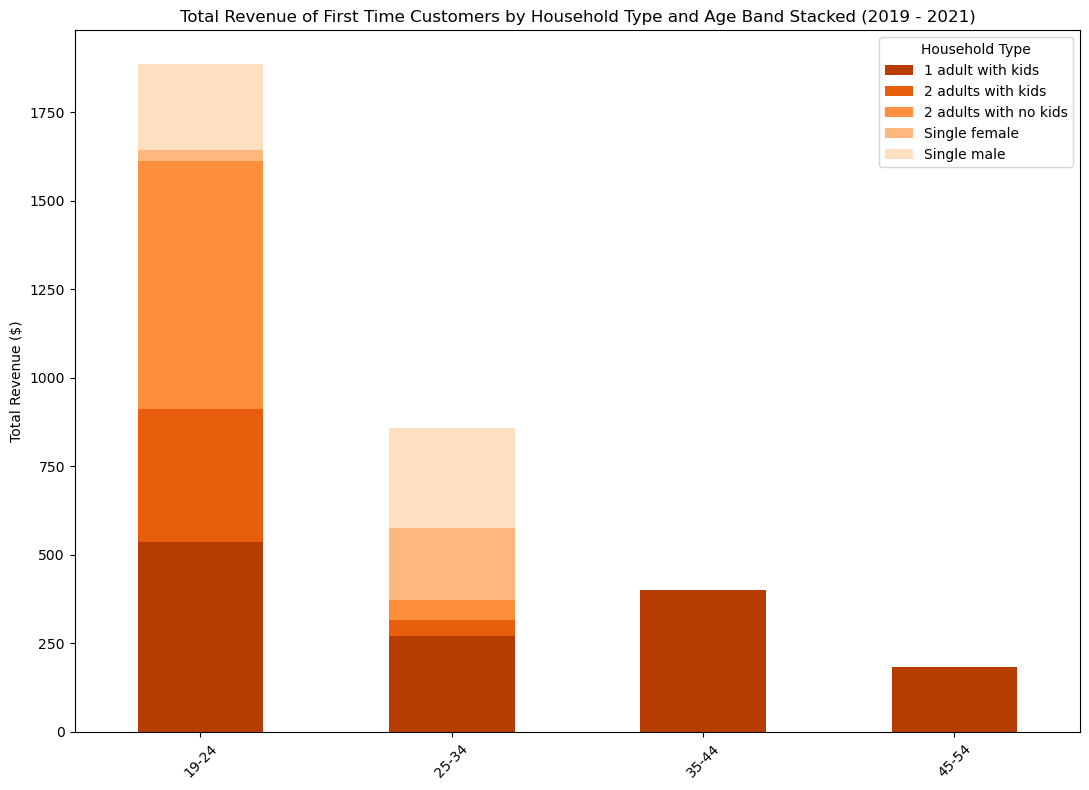

In [5]:

# Pivot the data
pivot_df = first_spend.pivot_table(index='age_band', columns='household_type', values='Total Revenue', aggfunc='sum', fill_value=0)

# Define the color palette
colors = sns.color_palette("Oranges_r", len(pivot_df.columns))

# Plot the stacked bar chart
pivot_df.plot(kind='bar', stacked=True, figsize=(11, 8), color=colors)

# Labeling and formatting
plt.title('Total Revenue of First Time Customers by Household Type and Age Band Stacked (2019 - 2021)')
plt.xlabel('')
plt.ylabel('Total Revenue ($)')
plt.xticks(rotation=45)
plt.legend(title='Household Type')
plt.tight_layout()

plt.savefig(f"Plots/{plt.gca().get_title()}.svg", format="svg", dpi=300, bbox_inches="tight")
plt.show();

In [6]:
first_group = first_timers.groupby(['age_band', 'household_type']).agg(
    unique_customers=('customer_id', 'nunique'),
    total_revenue=('price', 'sum')
).sort_values(by = ['total_revenue', 'unique_customers'], ascending = False).reset_index()
first_group

,age_band,household_type,unique_customers,total_revenue
0,19-24,2 adults with no kids,9,699.93
1,19-24,1 adult with kids,8,534.84
2,35-44,1 adult with kids,6,400.47
3,19-24,2 adults with kids,4,377.48
4,25-34,Single male,3,284.02
5,25-34,1 adult with kids,4,270.41
6,19-24,Single male,2,243.64
7,25-34,Single female,3,202.08
8,45-54,1 adult with kids,3,184.16
9,25-34,2 adults with no kids,1,55.75


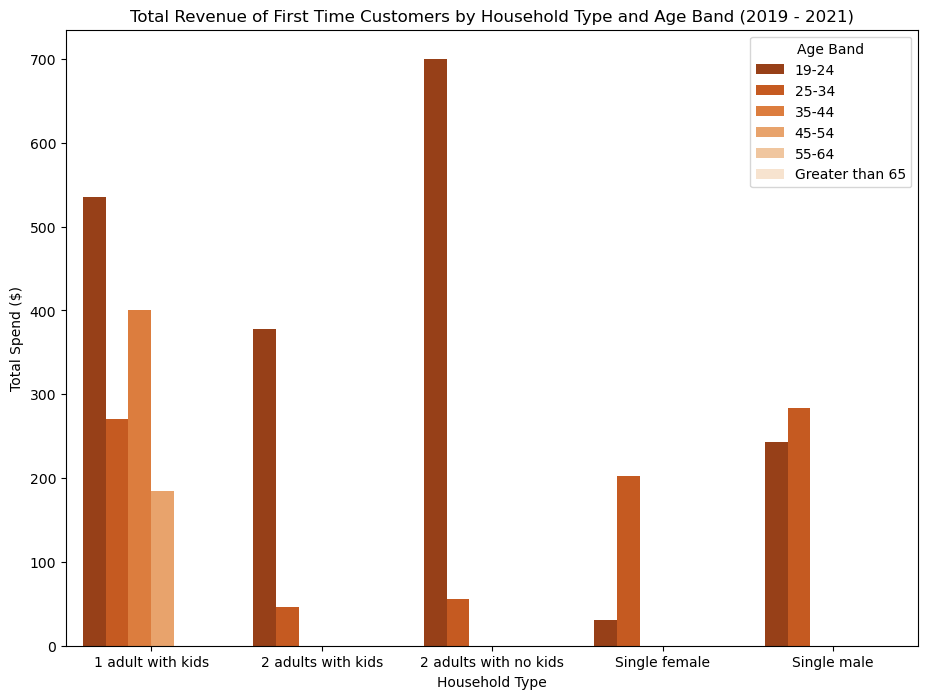

In [7]:
correct_order = ['19-24', '25-34', '35-44', '45-54', '55-64', 'Greater than 65']

plt.figure(figsize=(11, 8))
sns.barplot(
    data=first_group, x='household_type', y='total_revenue', hue='age_band', 
    palette='Oranges_r',
    order=['1 adult with kids', '2 adults with kids', 
           '2 adults with no kids', 'Single female', 'Single male'],
    hue_order=correct_order  
)

plt.xlabel('Household Type')
plt.ylabel('Total Spend ($)')
plt.title('Total Revenue of First Time Customers by Household Type and Age Band (2019 - 2021)')
plt.legend(title='Age Band') 

plt.savefig(f"Plots/{plt.gca().get_title()}.svg", format="svg", dpi=300, bbox_inches="tight")
plt.show();

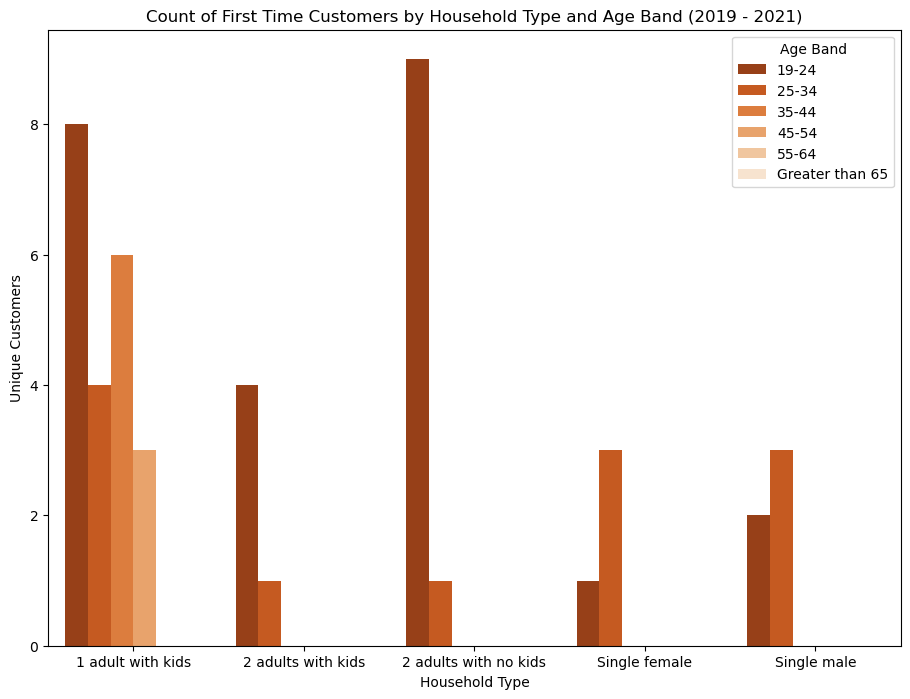

In [8]:
plt.figure(figsize=(11, 8))
sns.barplot(
    data=first_group, x='household_type', y='unique_customers', hue='age_band', 
    palette='Oranges_r',
    order=['1 adult with kids', '2 adults with kids', 
           '2 adults with no kids', 'Single female', 'Single male'],
    hue_order=correct_order  
)

plt.xlabel('Household Type')
plt.ylabel('Unique Customers')
plt.title('Count of First Time Customers by Household Type and Age Band (2019 - 2021)')
plt.legend(title='Age Band')  

plt.savefig(f"Plots/{plt.gca().get_title()}.svg", format="svg", dpi=300, bbox_inches="tight")
plt.show();